# 统计与大数据分析软件第八次作业

保证此代码和两个csv文件在同一目录下（VScode下可以运行代码），可以运行。

## 第一题

使用housing_renamed.csv中的数据构建3个不同的线性回归模型：

因变量为value_per_sq_ft, 自变量请自己选择(并不要求使用变量选择方法，自行选择即可)。

首先我们来读取一下文件：

In [23]:
import pandas as pd

# 读取上传的 CSV 文件
file_path = "housing_renamed.csv"
df = pd.read_csv(file_path)

# 查看前几行数据了解列结构
df.head()

,neighborhood,type,units,year_built,sq_ft,income,income_per_sq_ft,expense,expense_per_sq_ft,net_income,value,value_per_sq_ft,boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan


接下来，我们使用scikit-learn，并将数据分为训练集和测试集，然后使用回归模型进行训练和预测。

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

对数据进行预处理：

In [25]:
# 预处理：去除包含缺失值的行
df_clean = df.dropna(subset=[
    "value_per_sq_ft", "sq_ft", "income", "expense",
    "units", "year_built", "net_income",
    "income_per_sq_ft", "expense_per_sq_ft"
])

接下来选择自变量：

1. X1("sq_ft", "income", "expense")

2. X2("units", "year_built", "net_income")

3. X3("income_per_sq_ft", "expense_per_sq_ft")

4. X4("income_per_sq_ft", "expense_per_sq_ft", "sq_ft", "income", "expense", "units", "year_built", "net_income")

In [ ]:
# 定义三个模型的自变量
X1 = df_clean[["sq_ft", "income", "expense"]]
X2 = df_clean[["units", "year_built", "net_income"]]
X3 = df_clean[["income_per_sq_ft", "expense_per_sq_ft"]]
X4 = df_clean[["income_per_sq_ft", "expense_per_sq_ft", "sq_ft", "income", "expense", "units", "year_built", "net_income"]]
y = df_clean["value_per_sq_ft"]

设计一个训练模型对自变量和因变量进行预测，线性回归模型即可。

In [27]:
# 定义函数以拟合模型并输出结果
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "coefficients": model.coef_,
        "intercept": model.intercept_,
        "r2_score": r2_score(y_test, y_pred),
        "feature_names": X.columns.tolist()
    }

开始训练：

In [28]:
# 拟合三个模型
result1 = train_model(X1, y)
result2 = train_model(X2, y)
result3 = train_model(X3, y)
result4 = train_model(X4, y)

为了便于打印我们设计了一个函数来打印结果：

In [29]:
result = [result1, result2, result3, result4]

In [30]:
# 输出结果
i=0
while i<4:
    print("Model {} Results:".format(i+1))
    # print(i)
    print(result[i])
    i+=1

Model 1 Results:
{'coefficients': array([-1.42484186e-04,  2.02606984e-05, -3.26817072e-05]), 'intercept': 118.21606154978204, 'r2_score': 0.31492091676650313, 'feature_names': ['sq_ft', 'income', 'expense']}
Model 2 Results:
{'coefficients': array([-1.84546177e-01, -2.13964381e-01,  1.56361404e-05]), 'intercept': 538.3388422552172, 'r2_score': 0.30009064747265013, 'feature_names': ['units', 'year_built', 'net_income']}
Model 3 Results:
{'coefficients': array([ 7.33302491, -6.48490484]), 'intercept': -9.788292967632998, 'r2_score': 0.9684445656734674, 'feature_names': ['income_per_sq_ft', 'expense_per_sq_ft']}
Model 4 Results:
{'coefficients': array([ 7.32557098e+00, -6.05051763e+00,  3.83736111e-05, -9.63823986e+07,
        9.63823986e+07, -1.79367430e-02,  3.69704176e-02,  9.63823986e+07]), 'intercept': -85.68621294466405, 'r2_score': 0.968916583621104, 'feature_names': ['income_per_sq_ft', 'expense_per_sq_ft', 'sq_ft', 'income', 'expense', 'units', 'year_built', 'net_income']}


可以看到在这几个预测结果中，模型4效果最佳，因为它考虑了最多的自变量。

## 第二题

使用`iris.csv`数据进行聚类分析：不用`variety`列，

使用前四列数据进行`Kmeans`聚类分析(`k=3`)，并使用`pca`降维后作图显示聚类结果，然后与`variety`进行比较。

首先，我们加载上次用到的数据集：

In [31]:
import pandas as pd

# 加载数据集
data = pd.read_csv("iris.csv")

print('数据基本信息：')
data.info()

# 查看数据集行数和列数
rows, columns = data.shape
print(f'数据集行数：{rows}')
print(f'数据集列数：{columns}')

print(data.head())

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
数据集行数：150
数据集列数：5
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


特征提取：

In [32]:
# 提取特征
X = data.drop('variety', axis=1)
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


KMeans聚类+PCA降维：

In [33]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [34]:
# 进行Kmeans聚类
kmeans = KMeans(n_clusters=3, random_state=2024)
data['kmeans_labels'] = kmeans.fit_predict(X)

In [35]:
# 使用PCA将数据降维到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

绘制分类图像（训练结果和原结果）：

In [36]:
plt.rc('font', family='SimHei')  # 设置字体为 SimHei
plt.rc('axes', unicode_minus=False)  # 解决负号显示问题
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

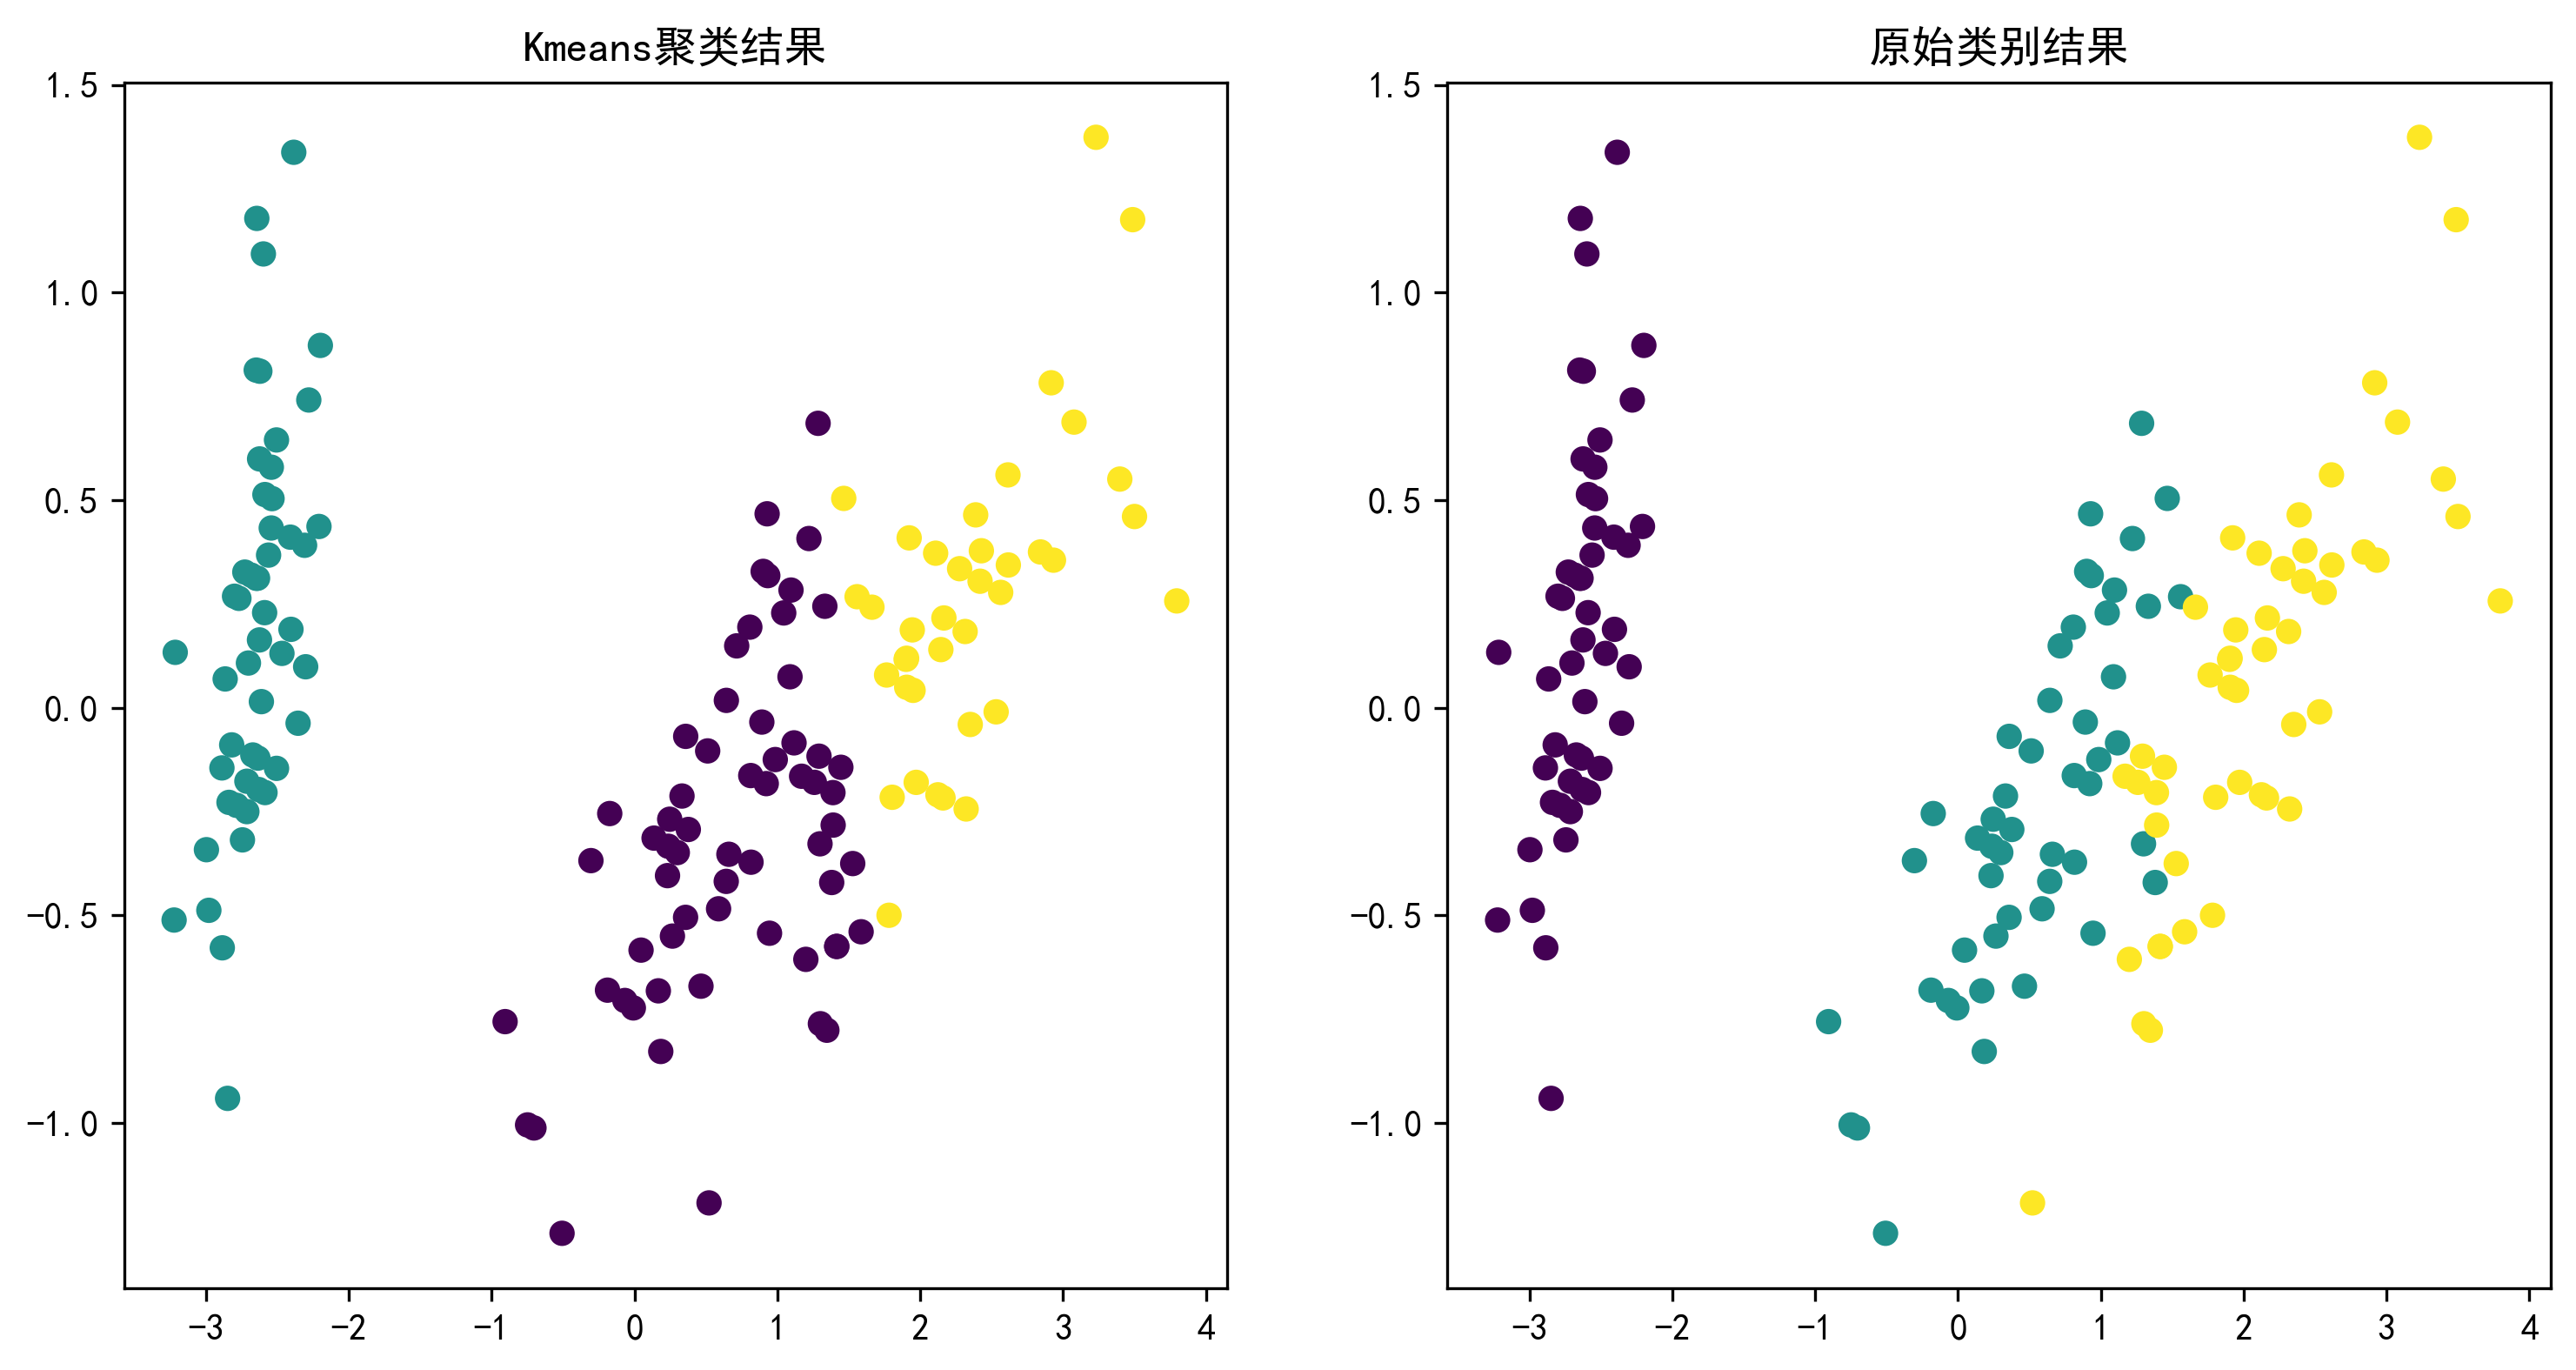

In [37]:
# 绘制Kmeans聚类结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['kmeans_labels'])
plt.title('Kmeans聚类结果')

# 绘制原始类别结果
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['variety'].astype('category').cat.codes)
plt.title('原始类别结果')

plt.show()

能看到基本上是比较吻合的！

顺便查看一下交叉表：

In [38]:
# 查看聚类结果与原始类别交叉表
print('聚类结果与原始类别交叉表：\n', pd.crosstab(data['kmeans_labels'], data['variety']))

聚类结果与原始类别交叉表：
 variety        Setosa  Versicolor  Virginica
kmeans_labels                               
0                   0          48         14
1                  50           0          0
2                   0           2         36


## 第三题

参考`statistical simulation`中的`Monte Carlo Integration`，模拟计算`PI`的值。

我们仿照文件，提出方法：

In [39]:
import numpy as np
import matplotlib.pyplot as plt

绘制一个正方形，在正方形内随机生成点，计算这些点中位于曲线下方的点的比例可以找到$\pi$的值：

In [40]:
# 定义正方形边界
x_min = -1
x_max = 1
y_min = -1
y_max = 1

In [41]:
# 正方形的面积
overall_area = (x_max - x_min) * (y_max - y_min)
print("正方形的面积:", overall_area)

正方形的面积: 4


蒙特卡洛预测的核心在于随机落点，我们可以通过随机落点计算落点位置的比率来模拟结果。

In [42]:
# 随机采样点
num_points = 10000000
X = np.random.uniform(low=x_min, high=x_max, size=num_points)
Y = np.random.uniform(low=y_min, high=y_max, size=num_points)

随机采样数量越大，效果越好。

In [43]:
# 判断点是否在圆内
inside_circle = (X**2 + Y**2) <= 1
# 计算 pi 的近似值
pi_approx = (inside_circle.sum() / num_points) * overall_area

print('Result of pi according to Monte Carlo simulation: ', pi_approx)

Result of pi according to Monte Carlo simulation:  3.1414424


已经很接近了！继续绘制图像：

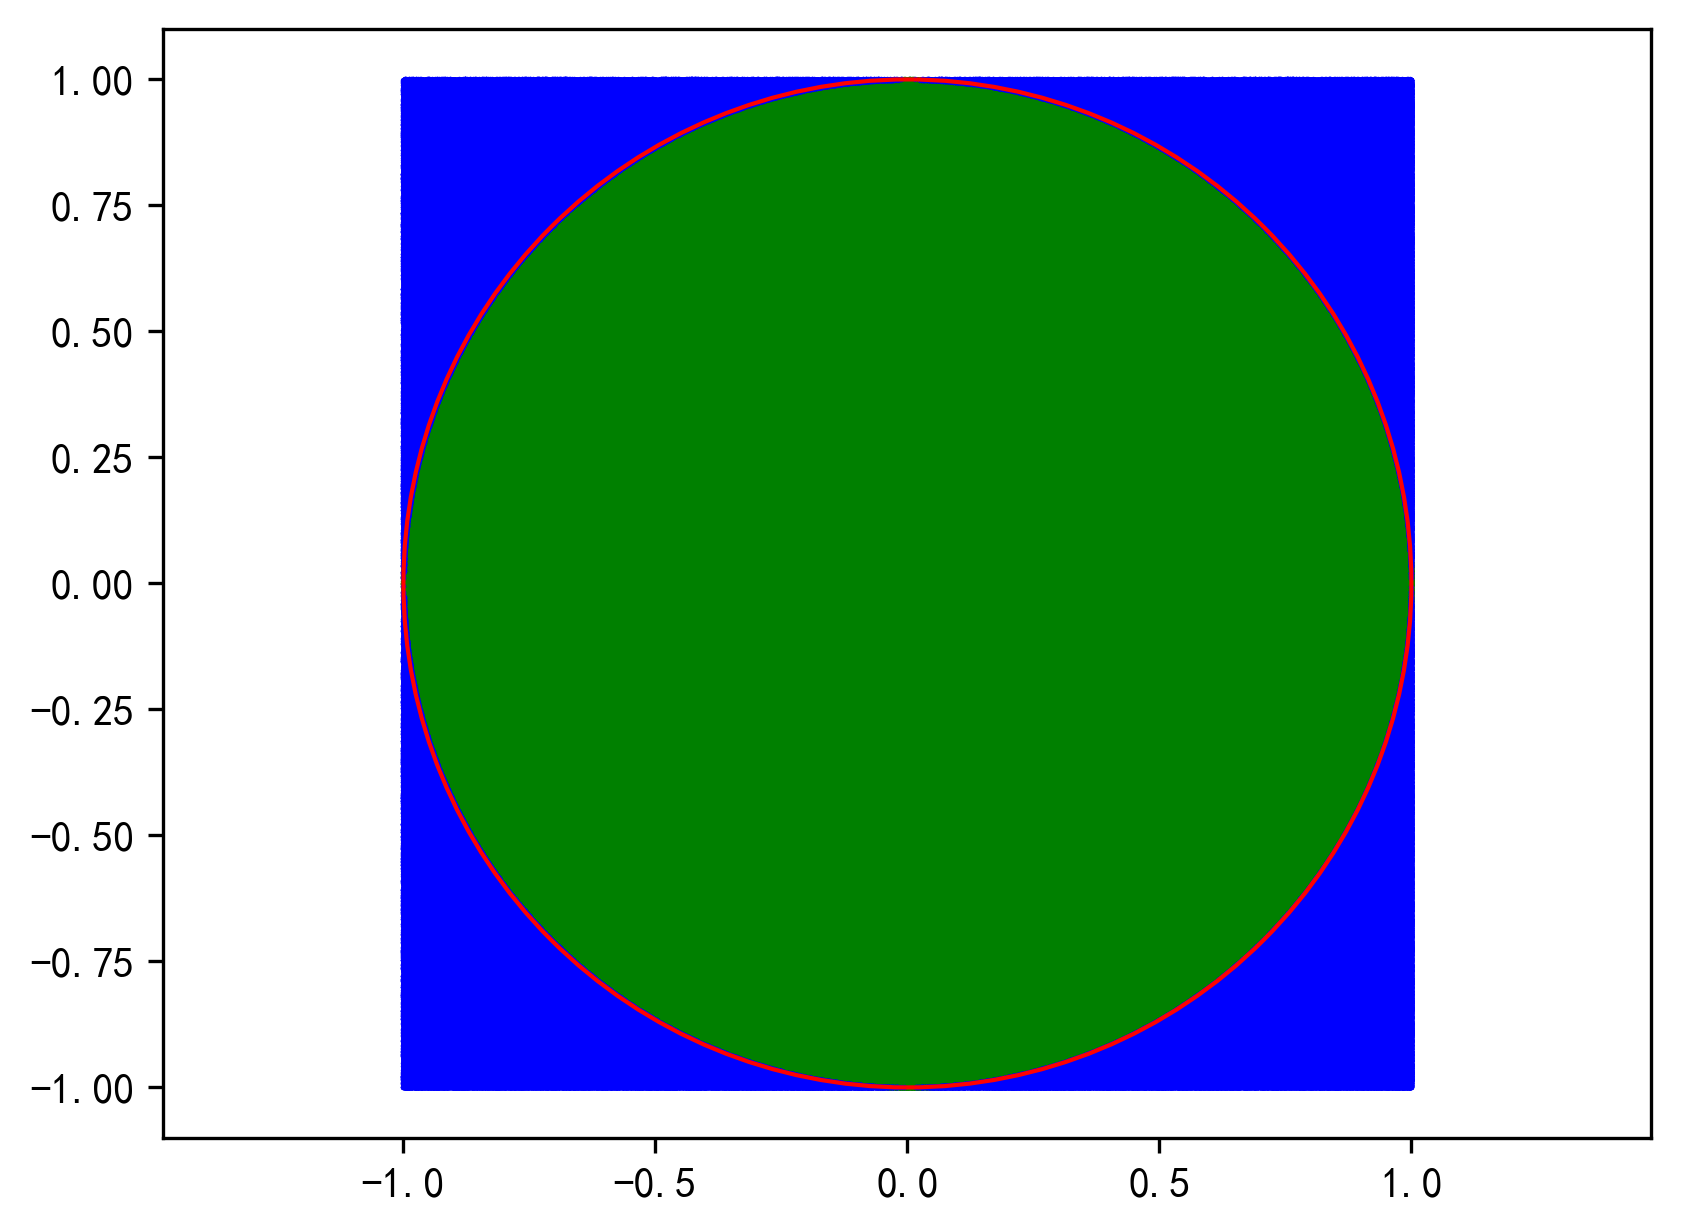

In [44]:
# 可视化
plt.scatter(X[inside_circle], Y[inside_circle], color='green', s=.1)
plt.scatter(X[~inside_circle], Y[~inside_circle], color='blue', s=.1)
circle = plt.Circle((0, 0), 1, color='red', fill=False)
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle)
plt.axis('equal')
plt.show()